## 이름: 홍진우

## 학번: 20205276

# Classifying Fashion-MNIST

* 이번 실습에서는 지난 시간과 거의 유사한 작업을 Fashion-MNIST dataset에 대해서 수행하겠습니다

* Fashion-MNIST 는 28x28 흑백으로 된 의류 image입니다
* 숫자를 표현한 MNIST 보다는 더 복잡한 image가 되어, NN의 성능을 시험해보기 조금 더 난해한 dataset 입니다 (물론 지금 시대에는 여전히 쉬운 작업입니다)

* dataset에 대한 그림은 아래와 같습니다

<div style="text-align:center"><img src='https://drive.google.com/thumbnail?id=1jS383QGptWGFyDrVO0i8Eo7BwXqV5epq&sz=w1000' width="300" height="300"></div>

* 작업은 여러분이 처음부터 끝까지 코딩을 하시면 됩니다
* 전체적인 흐름은 지난 주 숙제와 동일하기 때문에 (결국 10개의 의상 종류로 분류합니다) 지난 주 숙제 solution이나 본인이 짠 부분을 대부분 가져와서 해보시면 됩니다.

* 아래는 dataset을 준비하는 과정입니다

In [1]:
import torch
from torchvision import datasets, transforms
import helper

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=2000, shuffle=True)

100%|███████████████████████████████████████████████████████████████████| 26421880/26421880 [27:33<00:00, 15976.64it/s]


Extracting C:\Users\Administrator/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\Administrator/.pytorch/F_MNIST_data/FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 29515/29515 [00:02<00:00, 12322.34it/s]


Extracting C:\Users\Administrator/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\Administrator/.pytorch/F_MNIST_data/FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████| 4422102/4422102 [04:47<00:00, 15405.23it/s]


Extracting C:\Users\Administrator/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\Administrator/.pytorch/F_MNIST_data/FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<?, ?it/s]

Extracting C:\Users\Administrator/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\Administrator/.pytorch/F_MNIST_data/FashionMNIST\raw



In [3]:
images, labels = next(iter(trainloader))

In [4]:
images.shape

torch.Size([2000, 1, 28, 28])

In [5]:
torch.mean(images)

tensor(0.2854)

In [6]:
torch.std(images)

tensor(0.3532)

In [53]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'

In [64]:
torch.cuda.get_device_name(0)#기계학습을 위해 좋은 GPU가 필요했습니다

'NVIDIA GeForce RTX 3080 Ti'

In [55]:
torch.cuda.is_available()

True

In [48]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.28,), (0.35,))])
#정규화 이후 학습과 검증 데이터셋 분류

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
valset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

* 아래 명령으로 이미지 중에 한개를 살펴봐서 준비가 되었는지 확인해 봅시다

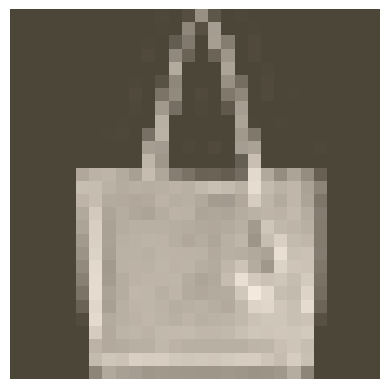

In [51]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :]);

### Problem 1

* 이미지가 28x28인 점을 고려하여 지난주에 벡터로 변환하는 작업을 수행하고
* fc1,...,fc4 까지 linear layer를 만드시고
* 최종 output layer fc4는 10개 분류 작업을 할 수 있도록 구성

* Activation 함수는 ReLU, 최종 layer는 linear layer 만 연산
* Cost function 정의
* autograd, optimizer를 사용하여 training 수행 
* fc1 는 256의 크기로 구성
* fc2 는 128의 크기로 구성
* fc3 는 64의 크기로 구성
* epoch수는 5

In [57]:
from torch import nn, optim
import torch.nn.functional as F


class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        #784인 이유는 28x28
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        
        #마지막 레이어는 10
        self.fc4 = nn.Linear(64,10)


    def forward(self, x):
        
        #Relu사용
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        #마지막 레이어는 linear layer만 
        x = self.fc4(x)

        return x
    ###############

### Problem 2: Training the network

In [75]:
# TODO: 네트워크를 training 하세요 (epoch는 5번으로 하죠)
model = Classifier()
model.to(device) #위에서 설정한 DEVICE에 맞추기.
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003) #원래 아담이 아니라 SGM였는데, 아담 씀.
                                                     #일반적으로 대부분 아담 쓰는데, 숙달되면 다시 SGD로 회귀...

epochs = 30

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:#이건 batch를 받는 for문
        images = images.reshape(images.shape[0], -1).to(device) #28by28을 벡터로 쭉 펴고 cuda로
        labels = labels.to(device) #레이블도 마찬가지
        #이때 중요. 레이블 CPU들어있고 이미지 GPU들어있고 이러면 에러남.
        #캡스톤 할때, 이거 몰라서 한번 뒤집어 엎은적 있었는데, 이 내용 보완해서 다시 해보기.
        
        logits = model(images) 
        loss = criterion(logits, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #### 

        running_loss += loss.item()

    print(f"Training loss: {running_loss / len(trainloader)}")

Training loss: 0.48417882294034653
Training loss: 0.36802477905077974
Training loss: 0.33415170969453445
Training loss: 0.311389207871738
Training loss: 0.2981439270873441
Training loss: 0.28703166020990434
Training loss: 0.27156005276720535
Training loss: 0.2677505219827837
Training loss: 0.255186609151378
Training loss: 0.24666756741813758
Training loss: 0.23840390975827347
Training loss: 0.2313813987190027
Training loss: 0.22731777224769154
Training loss: 0.22352648468445868
Training loss: 0.21561409999678002
Training loss: 0.21134298705041155
Training loss: 0.20798573320084163
Training loss: 0.2028557896745135
Training loss: 0.20722850504666884
Training loss: 0.18951168162291493
Training loss: 0.19433803864713037
Training loss: 0.1910878436238781
Training loss: 0.18200074196425772
Training loss: 0.18489262791696007
Training loss: 0.17728159382049716
Training loss: 0.17567491057569157
Training loss: 0.16795378394607605
Training loss: 0.1734638846874523
Training loss: 0.1673537032948

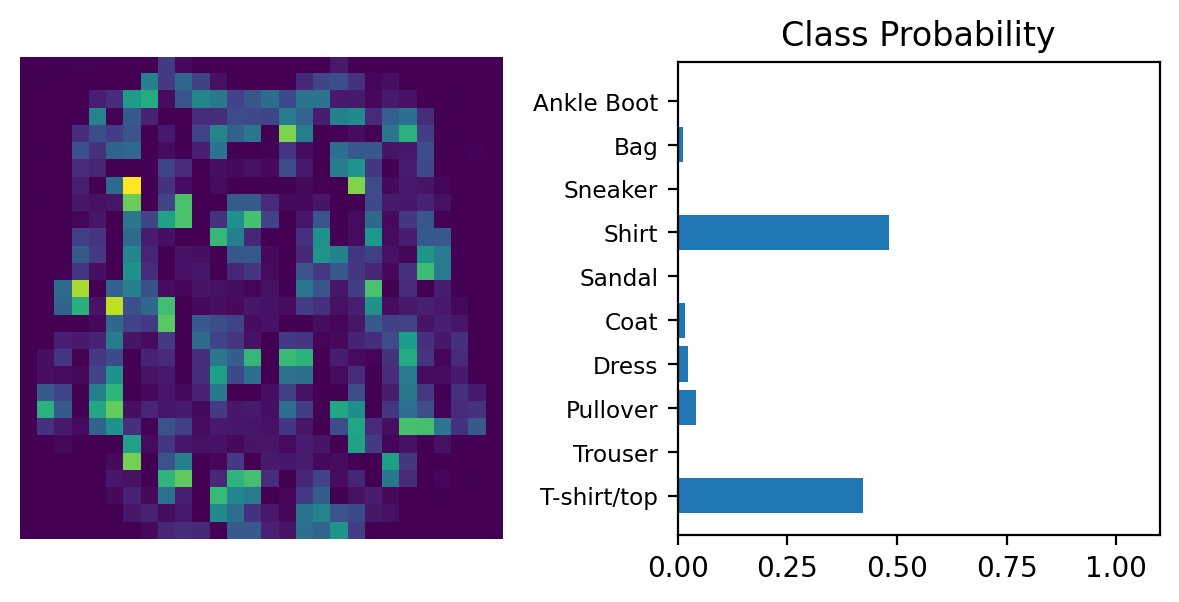

In [84]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test out your network!

images, labels = next(iter(valloader))
img = images[1].reshape(1, -1)#이미지 펴기
img = img.to(device)#이거 안까먹게 조심. 항상 device로 옮겨주기.

# log softmax 값을 softmax로 변환하여 확률값을 저장
logits = model(img)
sm = nn.Softmax(dim=1)#dim = 1 과  0 의 차이 주의.
ps = sm(logits)

# Plot the image and probabilities
helper.view_classify(img.to('cpu'), ps.cpu(), version='Fashion')#matplotlib는 cpu연산... 그래서 다시 cpu로 가져옴.

# Part 2: Inference and Validation

* 지금까지는 network를 training하는 방법에 대해서 알아보았습니다
* Training 된 network를 활용하여 예측 (prediction)을 하는 것을 ML 용어로 inference라고 합니다
* Training된 network를 새로운 데이터에 대해서도 좋은 성능을 갖게하는 것을 generalization 이라고 합니다 
* 하지만, neural network (또는 모든 ML)은  training 된 데이터에 너무 최적화되어, 새로운 데이터에대해서 성능이 떨어지는 (generalization 이 안되는) 문제가 발생합니다. 이런 현상을  **overfitting** 이라고 합니다
* **Generalization** 이 잘되어서 **overfitting** 안일어났는지 확인하는 작업을 **validation** set으로 data를 분리하여 수행합니다
* Overfitting이 일어나지 않도록 처리하는 여러 기법을 **regularization** 이라고 하며, 대표적으로 **dropout**과 같은것이 있습니다
* 이번 실습에서는 **validation**에 대해서 알아보겠습니다

* dataset 은 torchvision을 통해서 load하겠습니다
* Torchvision에 대한 자세한 기능은 차차 배우기로 학고, 우선은 테스트 세트를 load하기 위해서 `train=False` 로 설정합니다

```python
valset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
```

* validation set은 trainging set과 비슷한 구조를 갖습니다

* 본 작업에 목적은 training set에 포함하지 않은 data에 대해서 성능을 측정하는 것입니다
* 여기서 성능은 개발자에 의해서 용도에 맞게 설정합니다 
* 본 과제에서는 정확도 관점에서 성능을 측정학겠습니다
  - 즉 분류를 성공과 실패로 보고 성공의 비율을 측정합니다
* 기타 성능 측정을 위한 방법은 [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context)) 과 top-5 error rate 등이 있습니다
* 시작으로, 한개에 batch에 대한 forward pass를 실행합니다

In [85]:
model = Classifier()

images, labels = next(iter(valloader))

# Get the class probabilities
images = images.reshape(images.shape[0], -1)
logits = model(images)
ps = sm(logits)
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


* 출력은 각 classification 항목에 대한 확률 분포로 출력됩니다
* `ps.topk` method로 $k$개의 활률 값이 가장 높은 value와 index를 tuple로 받습니다
* 가장 높은 가능성으로 분류를 하고자하니, `ps.topk(1)`를 사용합니다
* 예를 들어서 가장 높은 value가 5번째이면 index 4를 받습니다

In [94]:
top_p, top_class = ps.topk(1, dim=1)#ps는 텐서임. 높은거 뽑아주는 topk
# Look at the most likely classes for the first 10 examples
print(top_class[:10, :])
print(top_p[:10, :])
top_class.shape

tensor([[5],
        [5],
        [5],
        [5],
        [7],
        [7],
        [5],
        [5],
        [5],
        [7]])
tensor([[0.1213],
        [0.1177],
        [0.1224],
        [0.1170],
        [0.1179],
        [0.1179],
        [0.1155],
        [0.1191],
        [0.1154],
        [0.1152]], grad_fn=<SliceBackward0>)


torch.Size([64, 1])

In [93]:
ps[:10, :]

tensor([[0.1084, 0.0872, 0.0952, 0.0866, 0.0945, 0.1213, 0.0993, 0.1149, 0.0983,
         0.0943],
        [0.1089, 0.0890, 0.0944, 0.0874, 0.0954, 0.1177, 0.0998, 0.1174, 0.1010,
         0.0891],
        [0.1099, 0.0865, 0.0926, 0.0864, 0.0941, 0.1224, 0.1005, 0.1175, 0.0992,
         0.0908],
        [0.1095, 0.0924, 0.0995, 0.0842, 0.0929, 0.1170, 0.1022, 0.1145, 0.0998,
         0.0879],
        [0.1050, 0.0852, 0.1023, 0.0950, 0.0963, 0.1140, 0.0911, 0.1179, 0.1030,
         0.0902],
        [0.1062, 0.0881, 0.1008, 0.0907, 0.0950, 0.1143, 0.0965, 0.1179, 0.1025,
         0.0880],
        [0.1071, 0.0889, 0.0991, 0.0921, 0.0933, 0.1155, 0.0979, 0.1139, 0.0987,
         0.0934],
        [0.1081, 0.0855, 0.0956, 0.0895, 0.0958, 0.1191, 0.0974, 0.1172, 0.1013,
         0.0905],
        [0.1076, 0.0900, 0.0997, 0.0893, 0.0910, 0.1154, 0.0965, 0.1152, 0.1050,
         0.0903],
        [0.1065, 0.0897, 0.0973, 0.0828, 0.0969, 0.1142, 0.0979, 0.1152, 0.1104,
         0.0893]], grad_fn=<

* 지금까지 네트워크에서 출력한 확률분포에서 가장 높은 확률값의 index를 64개 찾았습니다
* 이제 `top_class`와 `labels`를 비교하여 몇개를 맞췄는지 확인을 해야합니다
* 차원이 맞는 tensor 간에 `==`를 해서 비교합니다 (테스트 해보세요!)
* 다음을 실행하면 원하는 답이 나오지 않습니다
* `top_class`와 `labels`의 shape를 비교 해보고 싶은 생각이 드셔야합니다
```python
equals = top_class == labels
```
* (참고) broadcasting으로 `==` 연산이 일어난것이며, 우리가 원하는 연산은 아닙니다 

In [87]:
labels.shape

torch.Size([64])

In [88]:
top_class.shape

torch.Size([64, 1])

In [89]:
top_class == labels.reshape(top_class.shape)

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False

In [90]:
labels

tensor([1, 3, 1, 4, 6, 8, 0, 1, 1, 6, 5, 5, 9, 1, 1, 3, 9, 1, 7, 2, 8, 2, 8, 8,
        8, 6, 9, 7, 3, 4, 0, 5, 8, 7, 3, 9, 7, 8, 7, 3, 9, 1, 0, 3, 4, 3, 8, 0,
        4, 3, 0, 0, 6, 9, 7, 7, 3, 1, 1, 3, 1, 5, 3, 3])

In [97]:
equals = top_class == labels.reshape(top_class.shape)#equals 는 bool이라 나중에 쓰려면 변행 해줘야 함.
top_class.shape

torch.Size([64, 1])

* 이제 분류가 성공한 비율을 찾기위해서 전체를 더하고 총수로 나누는 (평균)을 내면됩니다
* `torch.mean`이 유용한데 
* `torch.mean(equals)`를 실행하면

```
RuntimeError: mean is not implemented for type torch.ByteTensor
```
* `equals`를 float tensor로 변환하여 적용합니다


In [98]:
accuracy = torch.mean(equals.type(torch.float))#bool to float
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 7.8125%


* 당연히 네트워크가 training이 안되었기 때문에 값이 랜덤하게 나옵니다
* 이제 전체 test data (validation set)에 대한 loop를 완성하려 합니다 (위는 한 batch)
* 아래 Exercise를 수행하는데 중요한 코드가 있습니다
* `torch.no_grad():`는 tensor에 gradient 정보 없이 작업을 할때 사용합니다. 당연히 training이 없으니 network parameter를 업데이트할 필요가 없고, gradient 정보를 저장하는데 쓸데 없는 연산과 메모리 사용을 방지할 수 있습니다. Validation과정에서는 필수입니다! 

```python
# turn off gradients
with torch.no_grad():
    # validation pass here
    for images, labels in testloader:
        ...
```


In [114]:
# 답 작성
model = Classifier()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, val_losses = [], [] #여기선 변형 x 
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.reshape(images.shape[0], -1).to(device)
        labels = labels.to(device)

        # 답작성: Training 코드 
        optimizer.zero_grad()
        
        logits = model(images)
        loss = criterion(logits, labels)#이때 업데이트 되기 전의 loss를 받음. 근데 믿에선 업데이트 된 후. 그래서 아래서 초기값이 바뀐체 나오는거.
        loss.backward()
        optimizer.step()

        #######################
        running_loss += loss.item()

    val_loss = 0
    accuracy = 0

    with torch.no_grad():
        for images, labels in valloader:
            images = images.reshape(images.shape[0],-1).to(device)
            labels = labels.to(device)
            logits = model(images)
            val_loss += criterion(logits, labels).item() #cpu로 가져오는 과정. 이거 없으면 좀있다 에러남.
            
            ps = sm(logits)
            top_p, top_class = ps.topk(1, dim=1)
            equals =top_class == labels.reshape(top_class.shape)
            accuracy += torch.mean(equals.type(torch.float))

            #######################

    train_losses.append(running_loss / len(trainloader))
    val_losses.append(val_loss / len(valloader))

    print("Epoch: {}/{}.. ".format(e + 1, epochs),
          "Training Loss: {:.3f}.. ".format(running_loss / len(trainloader)),
          "Validation Loss: {:.3f}.. ".format(val_loss / len(valloader)),
          "Validation Accuracy: {:.3f}".format(accuracy / len(valloader)))

Epoch: 1/30..  Training Loss: 0.486..  Validation Loss: 0.463..  Validation Accuracy: 0.838
Epoch: 2/30..  Training Loss: 0.370..  Validation Loss: 0.408..  Validation Accuracy: 0.851
Epoch: 3/30..  Training Loss: 0.336..  Validation Loss: 0.394..  Validation Accuracy: 0.858
Epoch: 4/30..  Training Loss: 0.314..  Validation Loss: 0.398..  Validation Accuracy: 0.859
Epoch: 5/30..  Training Loss: 0.298..  Validation Loss: 0.368..  Validation Accuracy: 0.872
Epoch: 6/30..  Training Loss: 0.287..  Validation Loss: 0.396..  Validation Accuracy: 0.863
Epoch: 7/30..  Training Loss: 0.273..  Validation Loss: 0.363..  Validation Accuracy: 0.872
Epoch: 8/30..  Training Loss: 0.268..  Validation Loss: 0.348..  Validation Accuracy: 0.882
Epoch: 9/30..  Training Loss: 0.252..  Validation Loss: 0.370..  Validation Accuracy: 0.878
Epoch: 10/30..  Training Loss: 0.250..  Validation Loss: 0.397..  Validation Accuracy: 0.872
Epoch: 11/30..  Training Loss: 0.240..  Validation Loss: 0.370..  Validation Ac

In [117]:
#과적합 아닌가?? 이건 뒤에서 다시 설명.

In [115]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

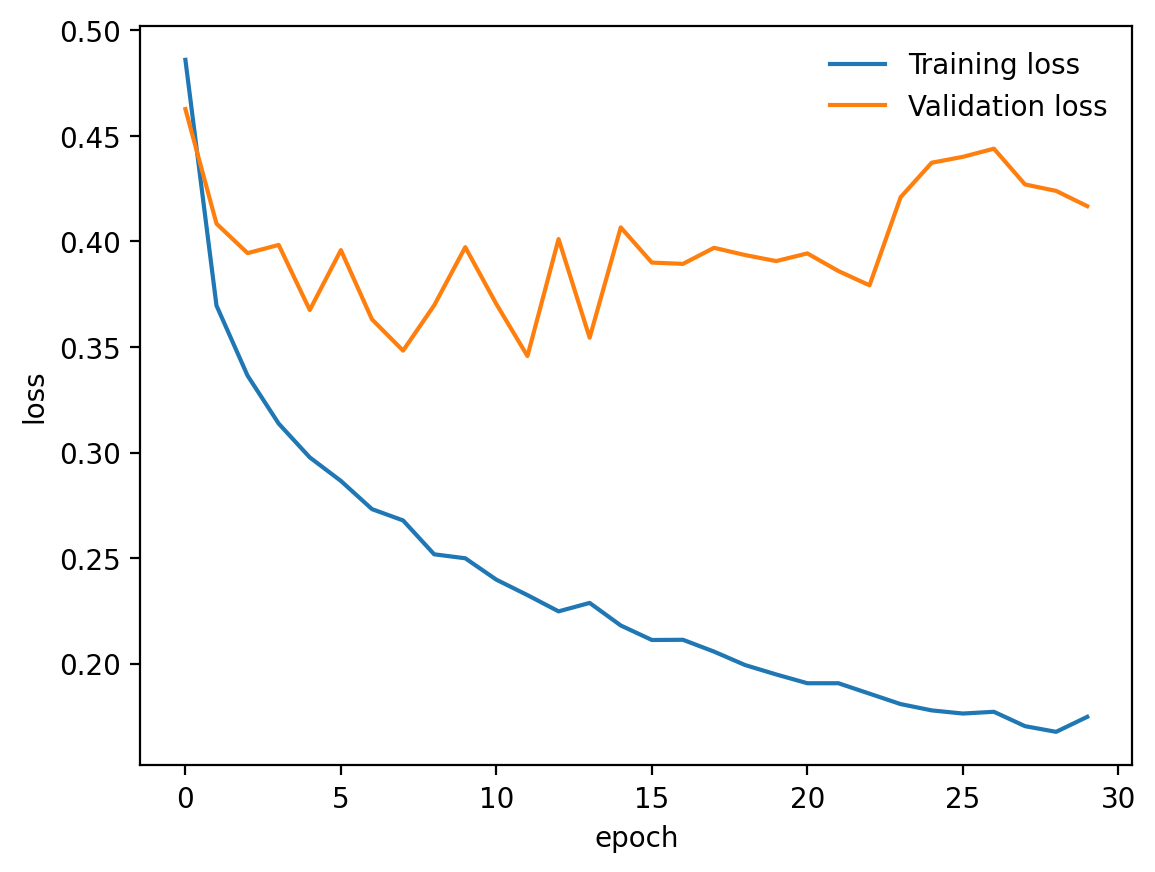

In [116]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('loss')

## Overfitting

* 위에서 수행한 결과를 살펴보면 overfitting 현상을 확인할 수 있습니다
* 같지는 않지만, 아래와 같은 현상:

<div style="text-align:center"><img src='https://drive.google.com/thumbnail?id=1QOvGv2H28H0X94tkUo5VU40TPeSjpI9q&sz=w1000' width="400" height="400"></div>

- Training loss는 점점 줄어드는 반면, validation loss는 일정 줄어들다가 다시 늘어나는 현상을 확인 할 수 있습니다. 
- 궁극적인 목적은 새로운 data에 대해서 잘 동작하는 것이기 때문에 가장 낮은 validation loss를 갖도록 하는것이 목표 입니다
- 그래프에서 착안 할 수 있는 방법중 하나는 가장 낮아지는 epoch를 찾아서 멈추는 방법입니다. 이런 방법을 *early-stopping*이라고 합니다 
- 실제 적용하는 practice에서는 많은 training을 수행하며, 그 중에서 가장 좋은 성능(lowest validation error)의 network을 선택합니다
- Early stopping 이외에 매우 자주 사용되는 regularization 방법은 *dropout* 입니다
- Dropout은 네트워크의 연결을 랜덤하게 일정 비율로 끊어버리는 방법입니다
- Dropout이 왜 효과가 있는지는 이론 수업에서 다루도록 하겠습니다
- Pytorch에서 dropout을 수행하는 방법은 [`nn.Dropout`](https://pytorch.org/docs/stable/nn.html#torch.nn.Dropout) module 통해서 합니다

```python
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = None
        self.fc2 = None
        self.fc3 = None
        self.fc4 = None
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        # output so no dropout here
        x = self.fc4(x)
        
        return x
```

* 여기서 Dropout은 training 단계에서만 사용하고, validation에서는 전체 네트워크를 사용해야 합니다 (Why?)
* 즉, validation 과정에서는 dropout을 비활성화 해야하죠
  - 이를 위해서 `model.eval()`을 사용합니다
  - 즉, `model.eval()` 모드 하에서는 droupout 확률이 0으로 동작합니다   
  - 다시 dropout를 수행할때는 `model.train()`으로 활성화 합니다
  - 일반적으로 아래와 같이 동작하죠
    1. Validation loop에서 gradient를 끄고, model을 evaluation mode로 설정
    2. validation loss를 계산하고 
    3. 다시 train mode로 변경 
    
```python
# turn off gradients
with torch.no_grad():
    
    # set model to evaluation mode
    model.eval()
    
    # validation pass here
    for images, labels in testloader:
        ...

# set model back to train mode
model.train()
```

**Problem 3:** 

- 아래 코드에서 dropout를 사용하기 위한 필요한 곳을 수정/채워 주세요
- model 에 dropout 적용, model.eval, model.train 등
- 아래 코드는 위에 적용했던 코드 problem 1 부분 제외한 모음입니다
- Template이라고 생각학고 적용하시면 됩니다

In [123]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        self.relu = nn.ReLU(True)
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        # Now with dropout 중간중간 차원 맞추는것까지 전부 다 알아서 해줌.
        #단 학습 단계에서만... test랑 val에서는 안씀.
        #위에 있는 확률은 model.eval로 끔.
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        # output so no dropout here
        x = self.fc4(x)
        
        return x
    ##############################

In [124]:
model = Classifier()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00267)

epochs = 50
steps = 0

train_losses, val_losses = [], []
for e in range(epochs):
    running_loss = 0

    for images, labels in trainloader:
        images = images.reshape(images.shape[0], -1).to(device)#
        labels = labels.to(device)

        # training 답 작성 
        optimizer.zero_grad()
        
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()


        #######################
        running_loss += loss.item()

    val_loss = 0
    accuracy = 0

    # Gradient를 계산할 필요 없으니 비활성화 
    with torch.no_grad():
        model.eval()#dropout쓸때는 eval로 써야 함. 그냥 썼었는데 이유가 이거였네
        for images, labels in valloader:
            images = images.reshape(images.shape[0],-1).to(device)
            labels = labels.to(device)
            
            logits = model(images)
            val_loss += criterion(logits, labels).item()
            
            ps = sm(logits)
            top_p, top_class = ps.topk(1, dim=1)
            equals =top_class == labels.reshape(top_class.shape)
            accuracy += torch.mean(equals.type(torch.float))

            ##################

    model.train()#그리고 for문 끝나면 다시 train으로 바꿔주기
    train_losses.append(running_loss / len(trainloader))
    val_losses.append(val_loss / len(valloader))

    print("Epoch: {}/{}.. ".format(e + 1, epochs),
          "Training Loss: {:.3f}.. ".format(train_losses[-1]),
          "Validation Loss: {:.3f}.. ".format(val_losses[-1]),
          "Validation Accuracy: {:.3f}".format(accuracy / len(valloader)))

Epoch: 1/50..  Training Loss: 0.560..  Validation Loss: 0.448..  Validation Accuracy: 0.834
Epoch: 2/50..  Training Loss: 0.445..  Validation Loss: 0.416..  Validation Accuracy: 0.852
Epoch: 3/50..  Training Loss: 0.417..  Validation Loss: 0.404..  Validation Accuracy: 0.857
Epoch: 4/50..  Training Loss: 0.395..  Validation Loss: 0.386..  Validation Accuracy: 0.859
Epoch: 5/50..  Training Loss: 0.386..  Validation Loss: 0.378..  Validation Accuracy: 0.869
Epoch: 6/50..  Training Loss: 0.374..  Validation Loss: 0.388..  Validation Accuracy: 0.866
Epoch: 7/50..  Training Loss: 0.368..  Validation Loss: 0.386..  Validation Accuracy: 0.861
Epoch: 8/50..  Training Loss: 0.359..  Validation Loss: 0.386..  Validation Accuracy: 0.867
Epoch: 9/50..  Training Loss: 0.355..  Validation Loss: 0.426..  Validation Accuracy: 0.852
Epoch: 10/50..  Training Loss: 0.355..  Validation Loss: 0.362..  Validation Accuracy: 0.874
Epoch: 11/50..  Training Loss: 0.348..  Validation Loss: 0.367..  Validation Ac

In [ ]:
#

In [125]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

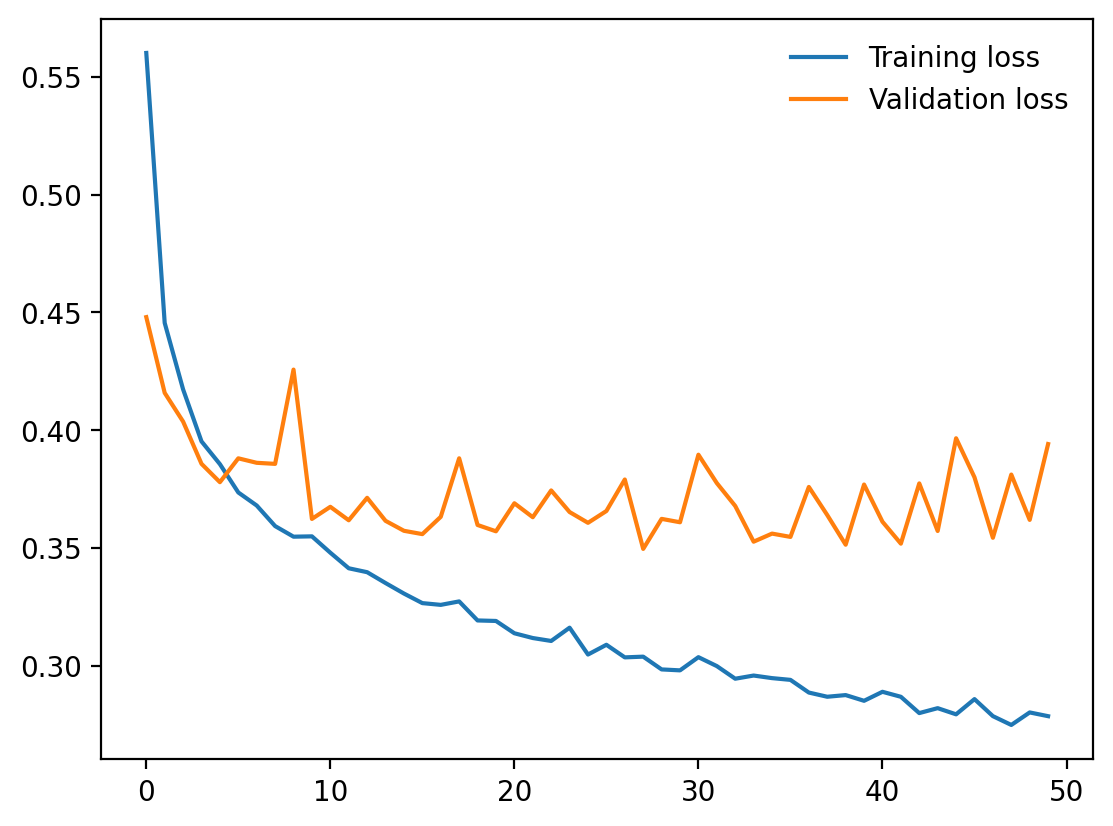

In [127]:
plt.plot(train_losses[:50], label='Training loss')
plt.plot(val_losses[:50], label='Validation loss')
plt.legend(frameon=False)

###### Inference

* 이제 실제 적용하는 예입니다 (inference)
* 내가 분류작업을 한다고 생각학고 traning이 끝난 네트워크에 적용합니다
* 당연히 model.eval()과 gradient는 비활성화합니다

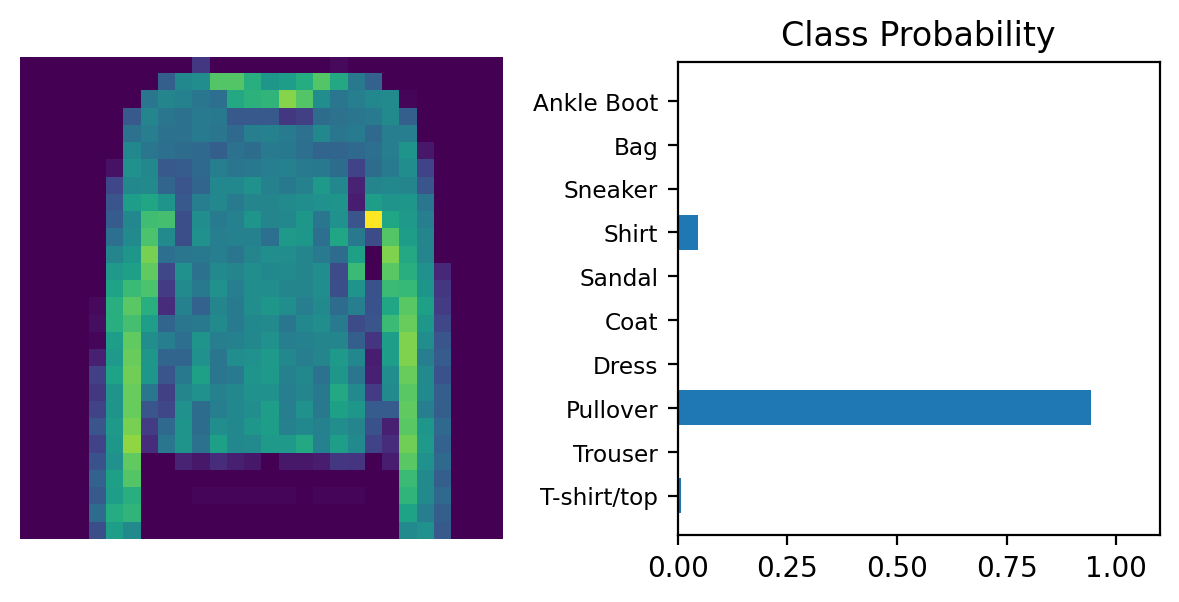

In [167]:
# Import helper module (should be in the repo)
import helper

# Test out your network!

model.eval()

dataiter = iter(valloader)
images, labels = next(dataiter)
images = images.reshape(images.shape[0], -1).to(device)
labels = labels.to(device)
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model(img)

ps = sm(output)

# Plot the image and probabilities
img = img.cpu()
ps = ps.cpu()
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

In [ ]:
for fold, (train_ind, valid_ind) in enumerate(kf.split(train_data)):  
    epochs = 30
    steps = 0
    
    print('Starting fold = ', fold)

    train_sampler_kfold = SubsetRandomSampler(train_ind)
    valid_sampler_kfold = SubsetRandomSampler(valid_ind)
    train_loader_kfold = torch.utils.data.DataLoader(train_data, batch_size=batch_size,sampler=train_sampler_kfold)
    valid_loader_kfold = torch.utils.data.DataLoader(train_data, batch_size=batch_size,sampler=valid_sampler_kfold)
    
    model = ConvNet()
    model.apply(reset_weights)
    #이부분이 중요.파라메터 초기화 안하면 그냥 epoch한번 더 돌린거랑 같음
    
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)
    
    #이 위로는 fold에 대한 내용
    
    train_losses, val_losses = [], [] #fold별 기록
    
    #여긴 자주 하던 epoch for문
    for e in np.arange(epoch):
        print('Starting epoch = ', e)

        # Training
        m.train()
        for Xtrain, ytrain in train_loader_kfold:
            Xtrain = Xtrain.reshape(Xtrain.shape[0],-1).to(device)
            ytrain = ytrain.to(device)
            
            optimizer.zero_grad()
            
            logits = model(images)
            loss = criterion(logits, ytrain)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

        # Validation
        val_loss = 0
        accuracy = 0
        m.eval()
        with torch.no_grad():
            for Xtrain, ytrain in valid_loader_kfold:
                Xval = Xval.reshape(Xval.shape[0], -1).to(device)
                yval = yval.to(device)

                logits = model(Xval)
                val_loss += criterion(logits, yval).item()

                ps = torch.softmax(logits, dim=1)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == yval.view(top_class.shape)
                accuracy += torch.mean(equals.type(torch.float)).item()
        
        train_losses.append(running_loss / len(train_loader_kfold))
        val_losses.append(val_loss / len(valid_loader_kfold))

        print(f"Epoch: {e + 1}/{epochs}, "
              f"Training Loss: {running_loss / len(train_loader_kfold):.3f}, "
              f"Validation Loss: {val_loss / len(valid_loader_kfold):.3f}, "
              f"Validation Accuracy: {accuracy / len(valid_loader_kfold):.3f}")
                
    fold +=1